In [ ]:
!unzip '/content/drive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/548681_1157383_bundle_archive.zip'

In [2]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
from imutils import paths
import random

In [3]:
dataset_path = './dataset'

In [57]:
%%bash
rm -rf dataset/train/covid/
rm -rf dataset/train/normal/
rm -rf dataset/test/covid
rm -rf dataset/test/normal
rm -rf dataset
mkdir -p dataset/train/covid
mkdir -p dataset/train/normal
mkdir -p dataset/test/covid
mkdir -p dataset/test/normal


In [5]:
samples = 15

In [58]:
covid_dataset_path = './images'

In [59]:
df = pd.read_csv("metadata.csv")
print(df['finding'].value_counts())
print(df['view'].value_counts())
print(os.path)

COVID-19          296
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
ARDS                4
E.Coli              4
No Finding          3
Legionella          2
Chlamydophila       2
Klebsiella          1
Name: finding, dtype: int64
PA               195
AP                58
AP Supine         45
Axial             41
L                 29
Coronal            3
AP semi erect      1
Name: view, dtype: int64
<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>


In [64]:
# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([f"{covid_dataset_path}", row["filename"]])
    print(imagePath)

    #if not os.path.exists(imagePath):
    #    continue
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["finding"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/train/covid", row["filename"]])
    print(outputPath)
    # copy the image
    shutil.copy2(imagePath, outputPath)

./images/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/nejmc2001573_f1a.jpeg
./dataset/train/covid/nejmc2001573_f1a.jpeg
./images/nejmc2001573_f1b.jpeg
./dataset/train/covid/nejmc2001573_f1b.jpeg
./images/lancet-case2a.jpg
./dataset/train/covid/lancet-case2a.jpg
./images/lancet-case2b.jpg
./dataset/train/covid/lancet-case2b.jpg
./images/1-s2.0-S0140673

In [61]:
# loop over the rows of the Normal data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] == "COVID-19" or row["finding"] == "COVID-19, ARDS":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([f"{covid_dataset_path}", row["filename"]])
    print(imagePath)

    #if not os.path.exists(imagePath):
    #    continue
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["finding"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/train/normal", row["filename"]])
    print(outputPath)
    # copy the image
    shutil.copy2(imagePath, outputPath)

./images/ARDSSevere.png
./dataset/train/normal/ARDSSevere.png
./images/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g07

Moving a part of the training dataset to the test dataset

In [65]:
basePath = './dataset/train/normal'
imagePaths = list(paths.list_images(basePath))

# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    print(imagePath)
    if os.path.exists(imagePath):
      filename = imagePath.split(os.path.sep)[-1]
      outputPath = os.path.sep.join([f"{dataset_path}/test/normal", filename])

      # cut the image
      shutil.move(imagePath, outputPath)

./dataset/train/normal/pneumocystis-pneumonia-1.jpg
./dataset/train/normal/legionella-pneumonia-2.jpg
./dataset/train/normal/wong-0002.jpg
./dataset/train/normal/cavitating-pneumonia-4-day28-PA.png
./dataset/train/normal/aspiration-pneumonia-5-day27.jpg
./dataset/train/normal/legionella-pneumonia-1.png
./dataset/train/normal/pneumocystis-pneumonia-2-L.png
./dataset/train/normal/X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg
./dataset/train/normal/parapneumonic-effusion-1-PA.png
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg
./dataset/train/normal/pneumocystis-jirovecii-pneumonia-3-3.jpg
./dataset/train/normal/chlamydia-pneumonia-PA.png
./dataset/train/normal/pneumocystis-pneumonia-8.jpg
./dataset/train/normal/pneumococcal-pneumonia-day0.jpg
./dataset/train/normal/F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg


In [66]:
basePath = './dataset/train/covid'
imagePaths = list(paths.list_images(basePath))

# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    print(imagePath)
    if os.path.exists(imagePath):
      filename = imagePath.split(os.path.sep)[-1]
      outputPath = os.path.sep.join([f"{dataset_path}/test/covid", filename])

      # cut the image
      shutil.move(imagePath, outputPath)

./dataset/train/covid/extubation-13.jpg
./dataset/train/covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png
./dataset/train/covid/covid-19-pneumonia-58-day-3.jpg
./dataset/train/covid/covid-19-pneumonia-28.png
./dataset/train/covid/extubation-8.jpg
./dataset/train/covid/ryct.2020200034.fig2.jpeg
./dataset/train/covid/16660_3_1.jpg
./dataset/train/covid/extubation-1.jpg
./dataset/train/covid/covid-19-caso-70-1-PA.jpg
./dataset/train/covid/nejmc2001573_f1b.jpeg
./dataset/train/covid/covid-19-pneumonia-22-day1-pa.png
./dataset/train/covid/16654_1_1.png
./dataset/train/covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg
./dataset/train/covid/covid-19-pneumonia-22-day2-pa.png
./dataset/train/covid/covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg


In [12]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

126 15
49 15


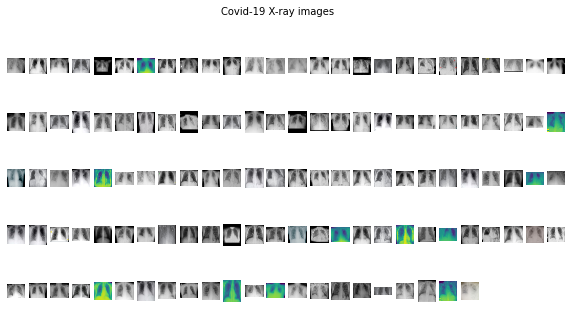

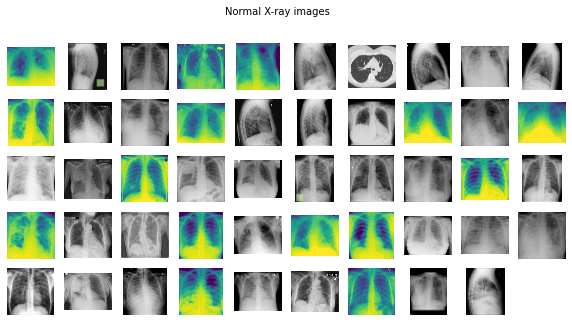

In [67]:
from imutils import paths
covid_images = list(paths.list_images(f"{dataset_path}/train/covid"))
normal_images = list(paths.list_images(f"{dataset_path}/train/normal"))
covid_test_images = list(paths.list_images(f"{dataset_path}/test/covid"))
normal_test_images = list(paths.list_images(f"{dataset_path}/test/normal"))
print(len(covid_images), len(covid_test_images))
print(len(normal_images), len(normal_test_images))
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

Importing the libraries

In [68]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator

Preprocessing the tarining directory and Validation directory

In [69]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/train',
        target_size=(224, 224),
        batch_size=15,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        batch_size=15,
        class_mode='binary')

Found 175 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Building the ResNet50 Model

In [70]:
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import preprocess_input

base_model = ResNet50(weights='imagenet', input_tensor=tf.keras.layers.Input(shape=(224,224,3)), include_top=False)
end_model = base_model.output
end_model = tf.keras.layers.Flatten()(end_model)
end_model = tf.keras.layers.Dense(units=128, activation='relu')(end_model)
end_model = tf.keras.layers.Dense(units=1, activation='sigmoid')(end_model)
ResNetmodel = Model(inputs=base_model.input, outputs=end_model)
ResNetmodel.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [71]:
class MyCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.95 :
      print("\n Recahed accuracy above 90% ")
      self.model.stop_training = True

Fitting your VGG19 Model

In [72]:
from tensorflow.keras.optimizers import Adam
INIT_LR = 0.0003
opt = Adam(lr=INIT_LR)
ResNetmodel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
hist = ResNetmodel.fit(x=train_generator, validation_data=validation_generator, epochs=10, callbacks=[MyCallback()])

Epoch 1/10
12/12 [==============================] - 126s 10s/step - loss: 2.5038 - acc: 0.6857 - val_loss: 15.5594 - val_acc: 0.5000
Epoch 2/10
12/12 [==============================] - 121s 10s/step - loss: 0.6855 - acc: 0.8229 - val_loss: 3.1232 - val_acc: 0.5000
Epoch 3/10
12/12 [==============================] - 122s 10s/step - loss: 0.3688 - acc: 0.8914 - val_loss: 3.5202 - val_acc: 0.5000
Epoch 4/10
12/12 [==============================] - 121s 10s/step - loss: 0.2758 - acc: 0.9200 - val_loss: 2.8648 - val_acc: 0.5000
Epoch 5/10
12/12 [==============================] - 120s 10s/step - loss: 0.1805 - acc: 0.9143 - val_loss: 10.0502 - val_acc: 0.5000
Epoch 6/10
12/12 [==============================] - ETA: 0s - loss: 0.1020 - acc: 0.9543
 Recahed accuracy above 80% 
12/12 [==============================] - 121s 10s/step - loss: 0.1020 - acc: 0.9543 - val_loss: 9.0660 - val_acc: 0.5000


Fitting your Model

Testing on a single image

In [75]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/dataset/train/normal/ARDSSevere.png', target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = ResNetmodel.predict(test_image)
print(train_generator.class_indices)
if result[0][0] == 0:
  print("Covid")
else:
  print("Normal")

{'covid': 0, 'normal': 1}
Normal


Visualizing the accuracy curve of the ResNet Model

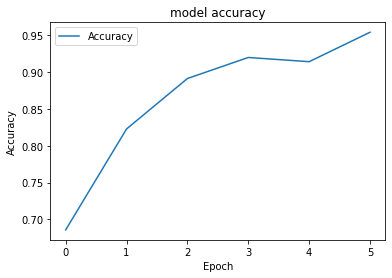

In [76]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()